In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [100]:
data = pd.read_csv('abalone.csv')

In [101]:
data

Sex  Length  Diameter  Height  Whole weightShucked weight  \
0      M   0.455     0.365   0.095                      0.5140   
1      M   0.350     0.265   0.090                      0.2255   
2      F   0.530     0.420   0.135                      0.6770   
3      M   0.440     0.365   0.125                      0.5160   
4      I   0.330     0.255   0.080                      0.2050   
...   ..     ...       ...     ...                         ...   
4172   F   0.565     0.450   0.165                      0.8870   
4173   M   0.590     0.440   0.135                      0.9660   
4174   M   0.600     0.475   0.205                      1.1760   
4175   F   0.625     0.485   0.150                      1.0945   
4176   M   0.710     0.555   0.195                      1.9485   

      Viscera weight  Shell weight   Rings  Age  
0             0.2245        0.1010  0.1500   15  
1             0.0995        0.0485  0.0700    7  
2             0.2565        0.1415  0.2100    9  
3             0.2155        0.1140  0.1550   10  
4             0.0895        0.0395  0.0550    7  
...              ...           ...     ...  ...  
4172          0.3700        0.2390  0.2490   11  
4173          0.4390        0.2145  0.2605   10  
4174          0.5255        0.2875  0.3080    9  
4175          0.5310        0.2610  0.2960   10  
4176          0.9455        0.3765  0.4950   12  

[4177 rows x 9 columns]

In [102]:
data.describe()

Length     Diameter       Height  Whole weightShucked weight  \
count  4177.000000  4177.000000  4177.000000                 4177.000000   
mean      0.523992     0.407881     0.139516                    0.828742   
std       0.120093     0.099240     0.041827                    0.490389   
min       0.075000     0.055000     0.000000                    0.002000   
25%       0.450000     0.350000     0.115000                    0.441500   
50%       0.545000     0.425000     0.140000                    0.799500   
75%       0.615000     0.480000     0.165000                    1.153000   
max       0.815000     0.650000     1.130000                    2.825500   

       Viscera weight  Shell weight        Rings          Age  
count     4177.000000   4177.000000  4177.000000  4177.000000  
mean         0.359367      0.180594     0.238831     9.933684  
std          0.221963      0.109614     0.139203     3.224169  
min          0.001000      0.000500     0.001500     1.000000  
25%          0.186000      0.093500     0.130000     8.000000  
50%          0.336000      0.171000     0.234000     9.000000  
75%          0.502000      0.253000     0.329000    11.000000  
max          1.488000      0.760000     1.005000    29.000000

In [103]:
print(f"{data['Sex']}")

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object


In [104]:
encoder = LabelEncoder()
df = data

df['Sex'] = encoder.fit_transform(df['Sex'])
gender_mappings = {index:label for index, label in enumerate(encoder.classes_)}

In [105]:
gender_mappings

{0: 'F', 1: 'I', 2: 'M'}

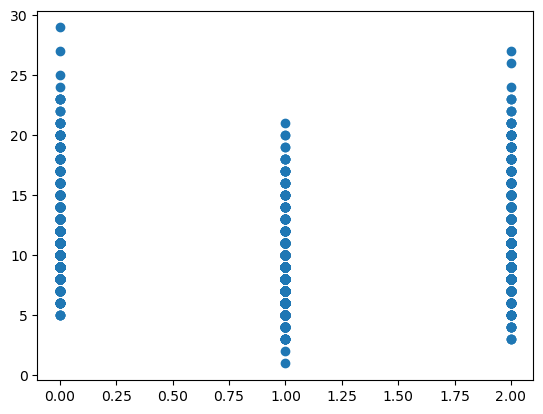

In [153]:
plt.scatter(df['Sex'], df['Age'])
plt.show()  # ; can be added on the code above instead of writing plt.show()

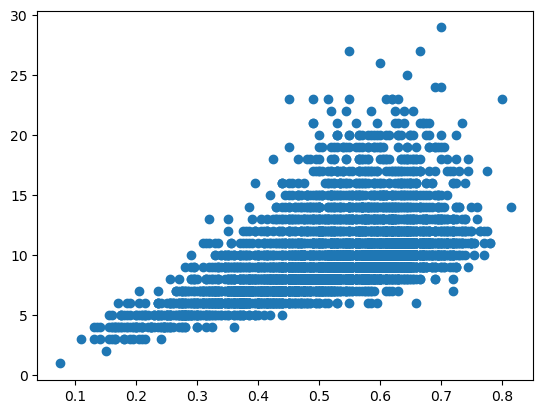

In [155]:
plt.scatter(df['Length'],df['Age']);

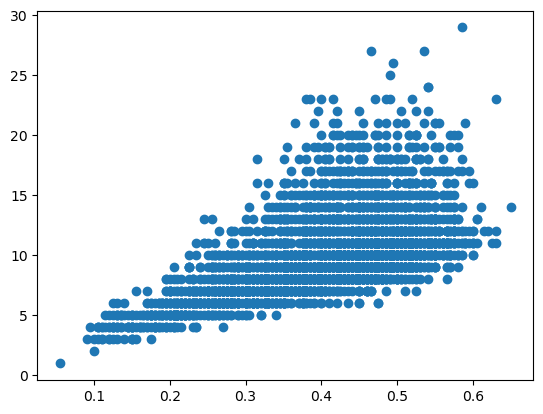

In [157]:
plt.scatter(df['Diameter'],df['Age']);

In [109]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weightShucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Age'],
      dtype='object')

In [110]:
df.rename(columns={'Whole weightShucked weight' : 'Whole weight'}, inplace=True)

In [111]:
X = df[['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Viscera weight',
       'Shell weight', 'Rings']]
Y = df['Age']

In [112]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [113]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)

In [114]:
std_model = LinearRegression()
l1_model = Lasso(alpha=1)
l2_model = Ridge(alpha=1)

std_model.fit(x_train, y_train)
l1_model.fit(x_train, y_train)
l2_model.fit(x_train, y_train)

Ridge(alpha=1)

In [115]:
print(f"------- Without Regularization: {std_model.score(x_test, y_test)} ")
print(f"---- With Lasso Regularization: {l1_model.score(x_test, y_test)} ")
print(f"---- With Ridge Regularization: {l2_model.score(x_test, y_test)} ")

------- Without Regularization: 0.43708525879764937 
---- With Lasso Regularization: -0.0009553154737842462 
---- With Ridge Regularization: 0.5114241555971384 


In [116]:
std_prediction = std_model.predict(x_test)
l1_prediction = l1_model.predict(x_test)
l2_prediction = l2_model.predict(x_test)

In [117]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

In [118]:
a= r2_score(y_test, std_prediction)
b= mean_absolute_error(y_test, std_prediction)
c= mean_squared_error(y_test, std_prediction)
d= math.sqrt(mean_squared_error(y_test, std_prediction))

print("for standard regression:")
print(f"{a} , {b} , {c} , {d}")

for standard regression:
0.43708525879764937 , 1.541777899055557 , 4.833191560898474 , 2.198452082920725


In [119]:
a= r2_score(y_test, l1_prediction)
b= mean_absolute_error(y_test, l1_prediction)
c= mean_squared_error(y_test, l1_prediction)
d= math.sqrt(mean_squared_error(y_test, l1_prediction))

print("for Lasso regression:")
print(f"{a} , {b} , {c} , {d}")

for Lasso regression:
-0.0009553154737842462 , 2.2231797487787657 , 8.594212283819584 , 2.9315886962225077


In [120]:
a= r2_score(y_test, l2_prediction)
b= mean_absolute_error(y_test, l2_prediction)
c= mean_squared_error(y_test, l2_prediction)
d= math.sqrt(mean_squared_error(y_test, l2_prediction))

print("for Ridge regression:")
print(f"{a} , {b} , {c} , {d}")

for Ridge regression:
0.5114241555971384 , 1.5353210984273011 , 4.194917054371316 , 2.048149666008643
